<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#**Loading The Data**

In [128]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-128-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


In [129]:
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [130]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 **Note**  :  ***V1 - V28***  are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

In [131]:
C_card.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#**Data preprocessing and feature engineering**

##preprocessing

In [132]:
C_card.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [133]:
C_card = C_card.drop(['Time'] , axis = 1)

In [134]:
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

In [135]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x[["Amount"]] = scaler.fit_transform(x[['Amount']])

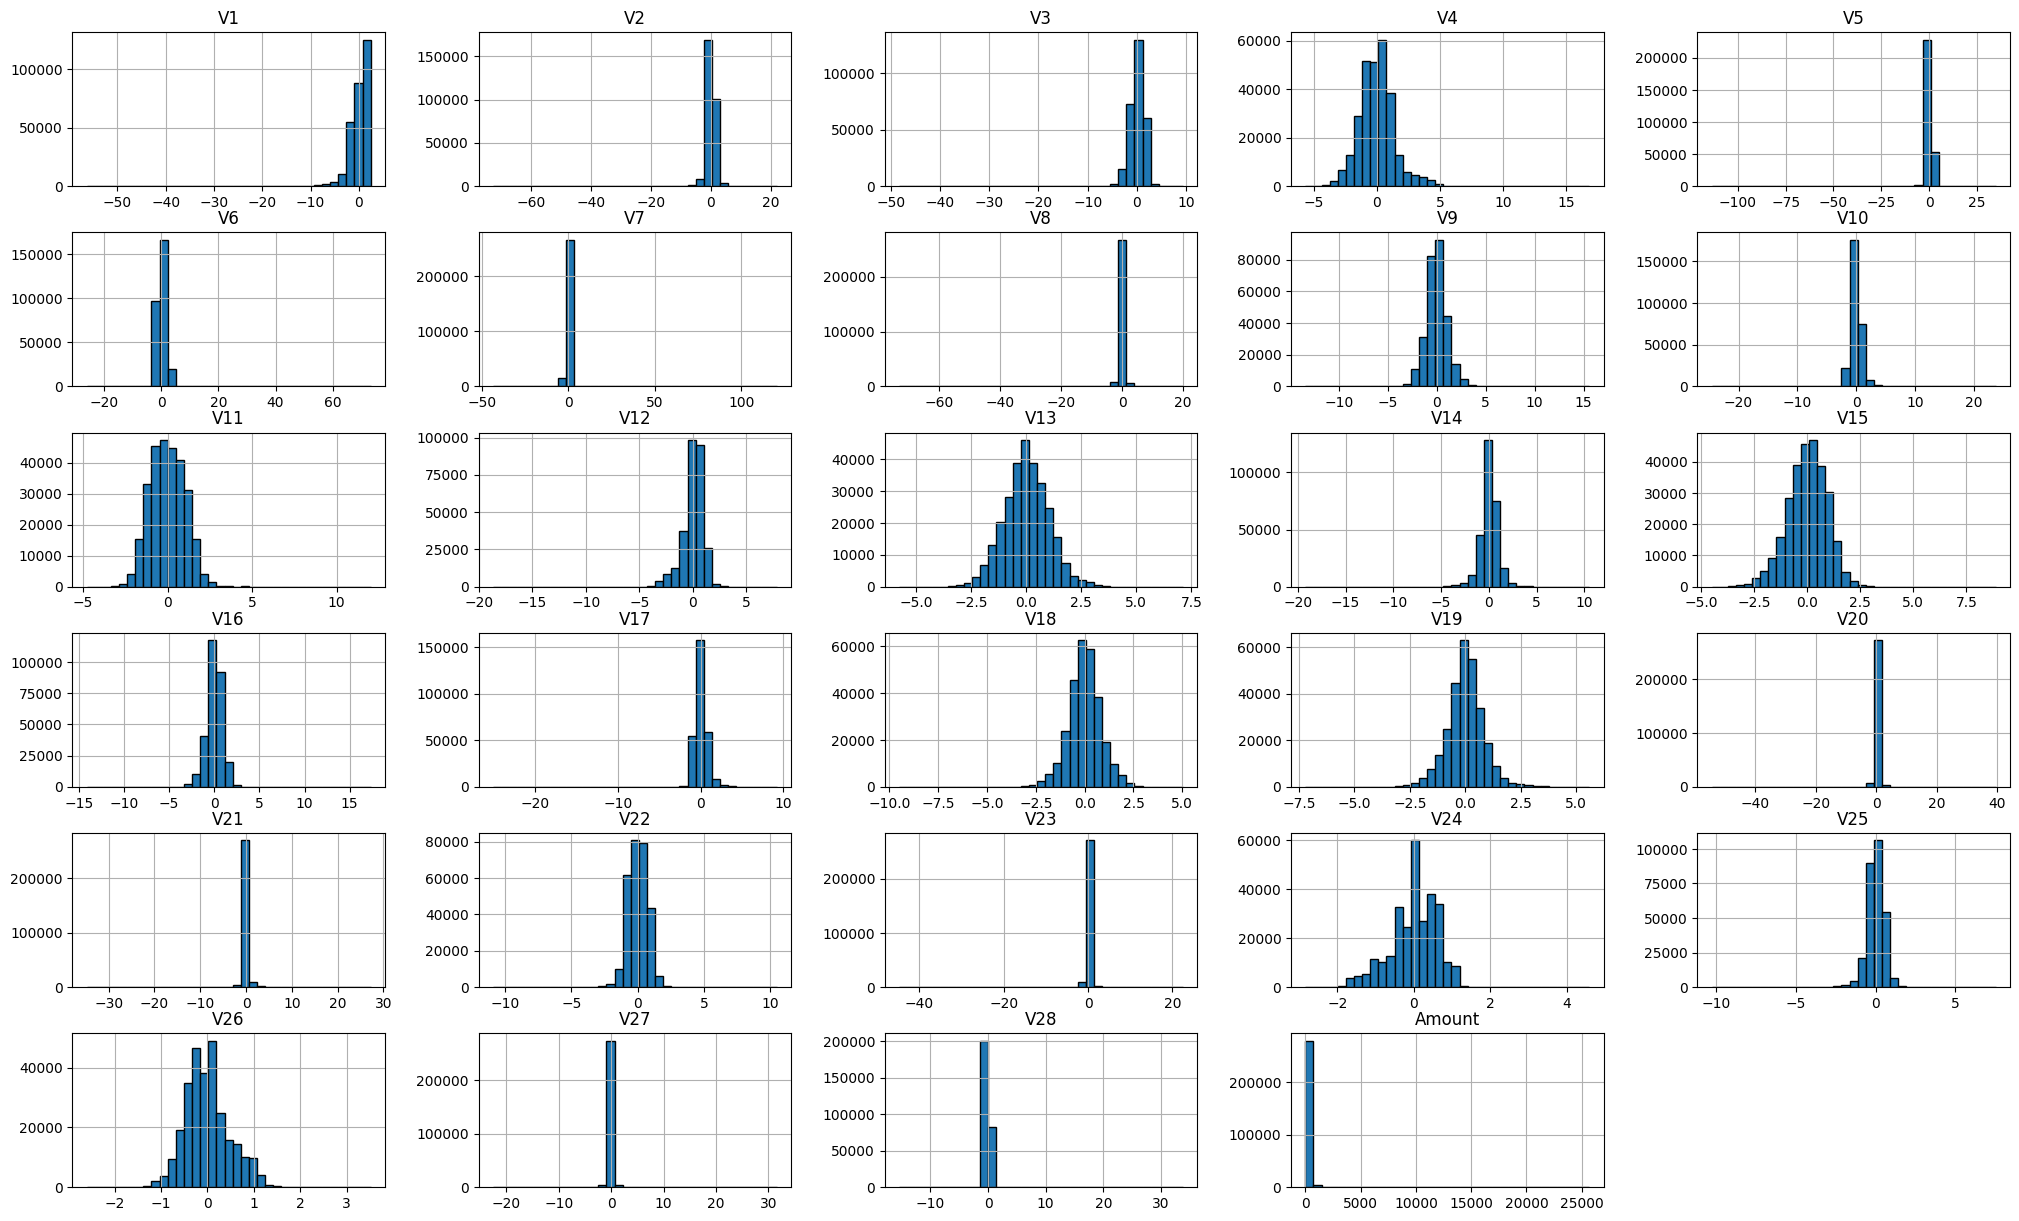

In [136]:
x.hist(figsize=(25, 15), bins=35, edgecolor='black')

plt.show()

In [137]:
# Left Skewed
# x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]]=np.sqrt(x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]])

# Right Skewed
# x[[ "V5", "V10", "V12", "V18", "V25","Amount"]]=np.sqrt(x[["V5", "V10", "V12", "V18", "V25","Amount"]])

cols = ["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28",
        "V5", "V10", "V12", "V18", "V25", "Amount"]

# for col in cols:
#     x[col] = np.cbrt(x[col])
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson') #yeo-johnson ← A safe method to transform negative and positive values ​​to be closer to a normal distribution.
x[cols] = pt.fit_transform(x[cols])

In [138]:
x.max()

,0
V1,1.868337
V2,23.425505
V3,9.382558
V4,16.875344
V5,27.502326
V6,23.060577
V7,97.689206
V8,20.007208
V9,15.594995
V10,16.284968


In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

##**Highly imbalanced**

Class
0    284315
1       492
Name: count, dtype: int64


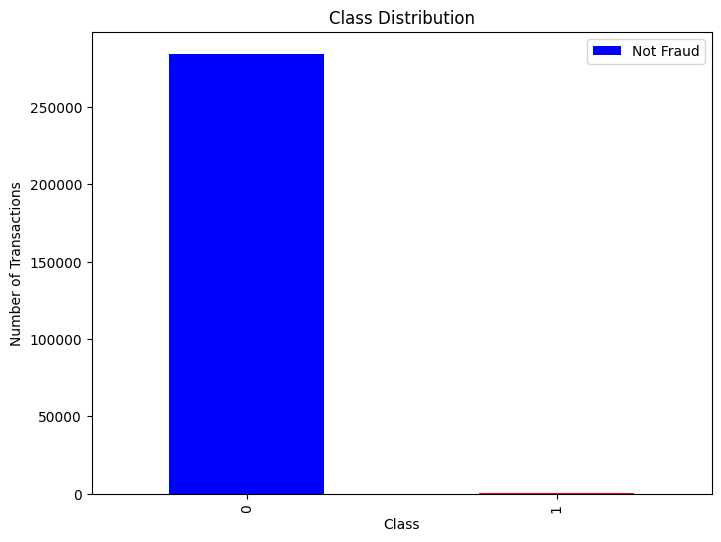

In [140]:
Label_counts = y.value_counts()
print(Label_counts)

plt.figure(figsize=(8, 6))
Label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.show()

In [141]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x_scaled, y)
x_balanced = pd.DataFrame(x_resampled, columns=x.columns)


Class
0    492
1    492
Name: count, dtype: int64


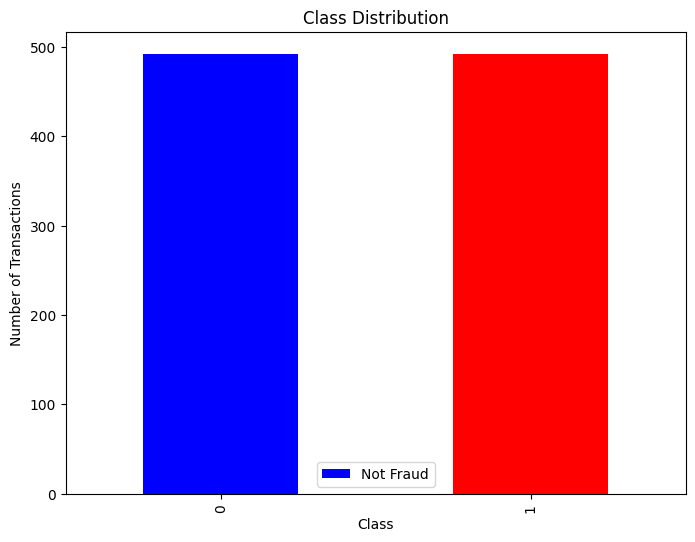

In [142]:
Balanced_Label_counts = y_resampled.value_counts()

print(Balanced_Label_counts)

plt.figure(figsize=(8, 6))
Balanced_Label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.show()

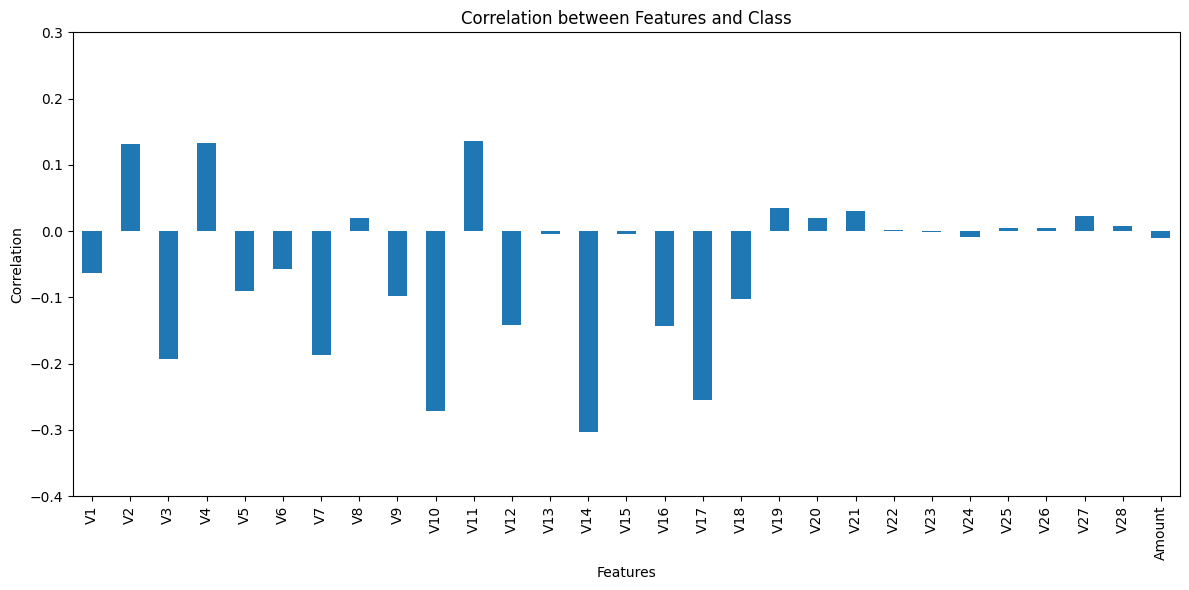

In [143]:
correlation_matrix = x.corrwith(y)
plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar')
plt.title('Correlation between Features and Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylim(-0.4, 0.3)
plt.tight_layout()
plt.show()

##**Feature Creation**

In [148]:
correlation_matrix=x_balanced.corr().round(6)

In [144]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(x_balanced, y_resampled)
importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

,Feature,Importance
13,V14,0.148616
9,V10,0.126199
3,V4,0.120696
16,V17,0.119218
11,V12,0.093325
10,V11,0.089233
2,V3,0.037177
1,V2,0.034140
15,V16,0.033454
8,V9,0.020018


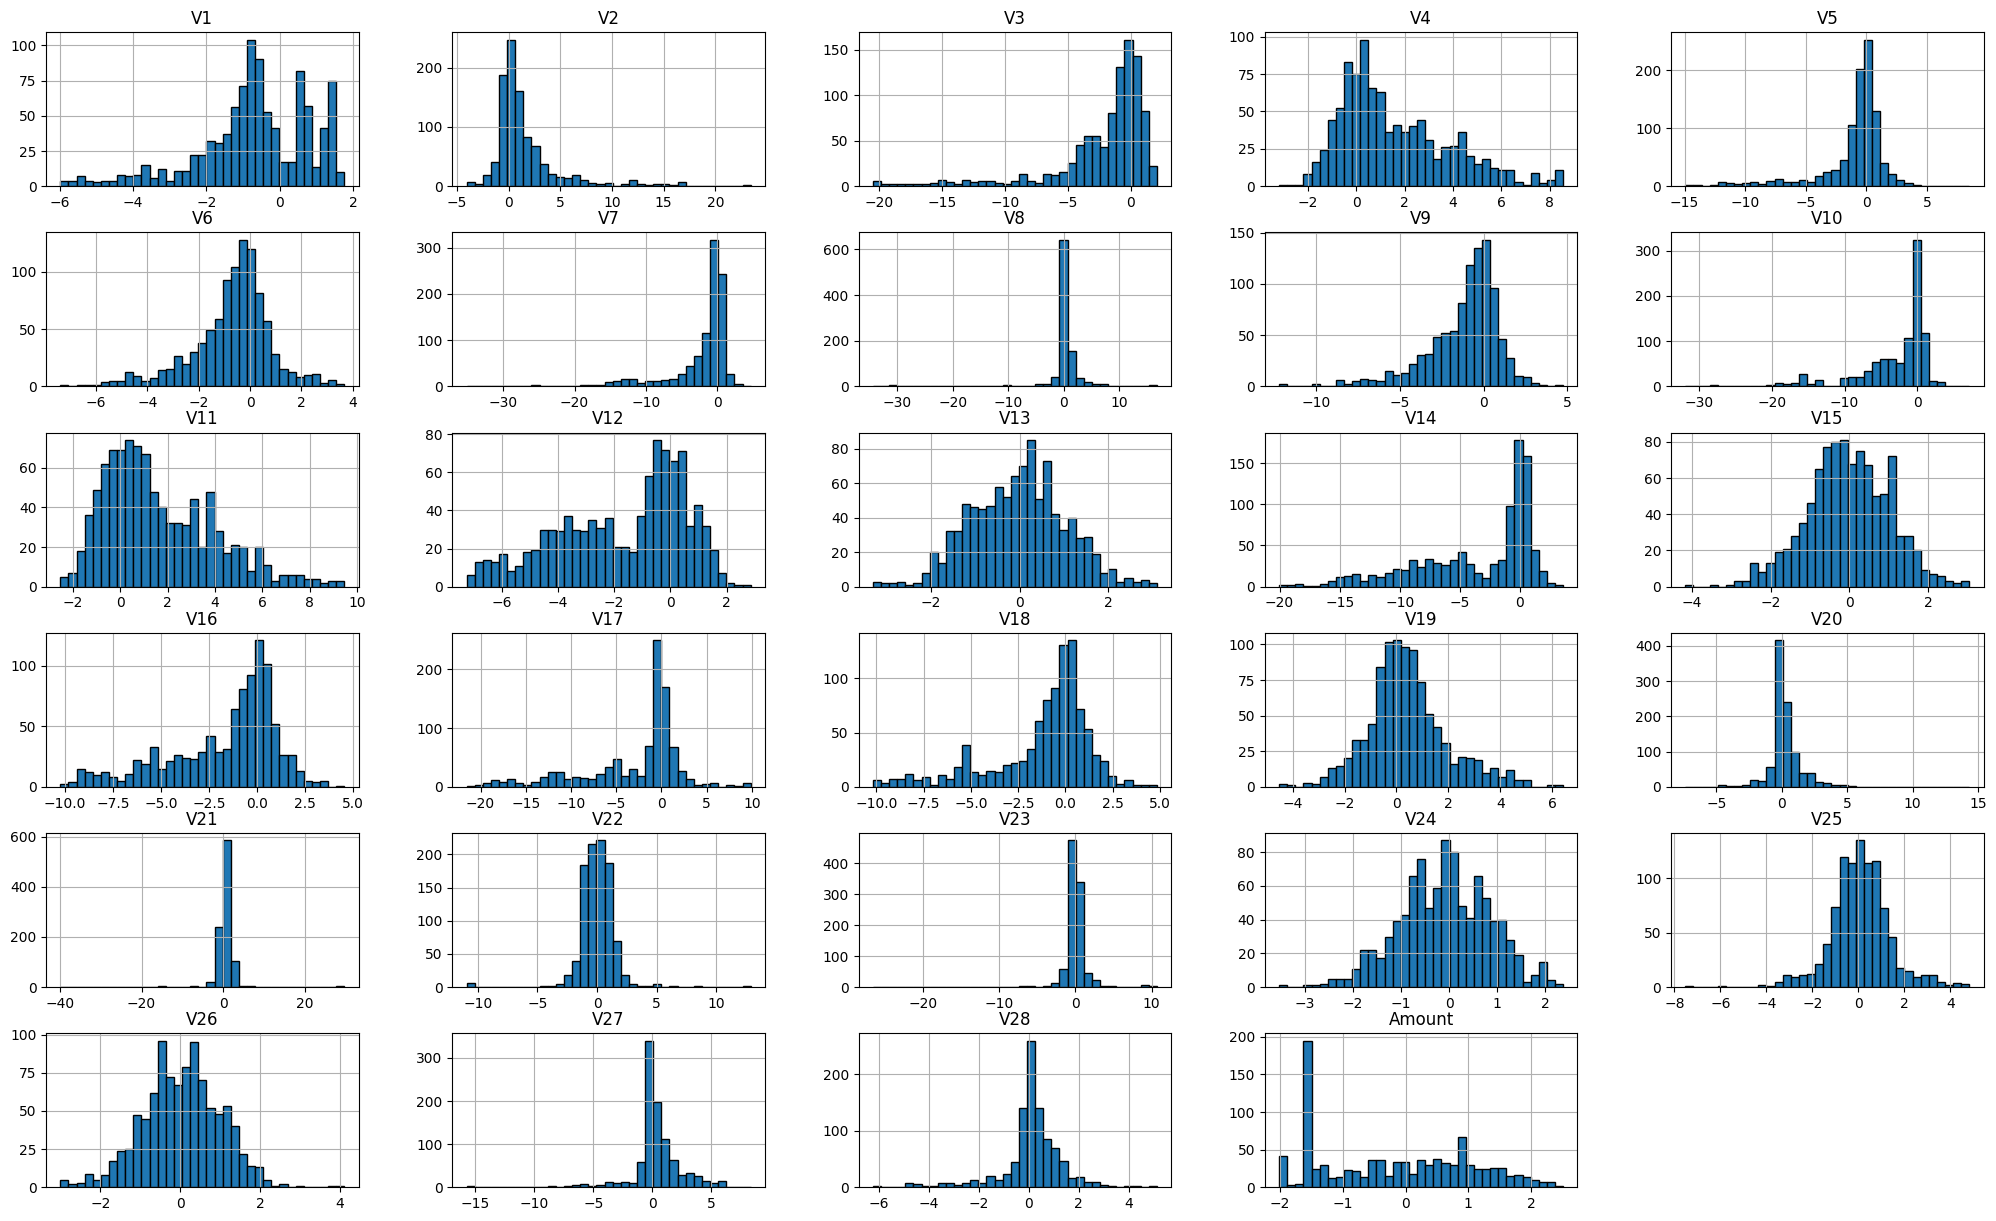

In [149]:
x_balanced.hist(figsize=(25, 15), bins=35, edgecolor='black')

plt.show()

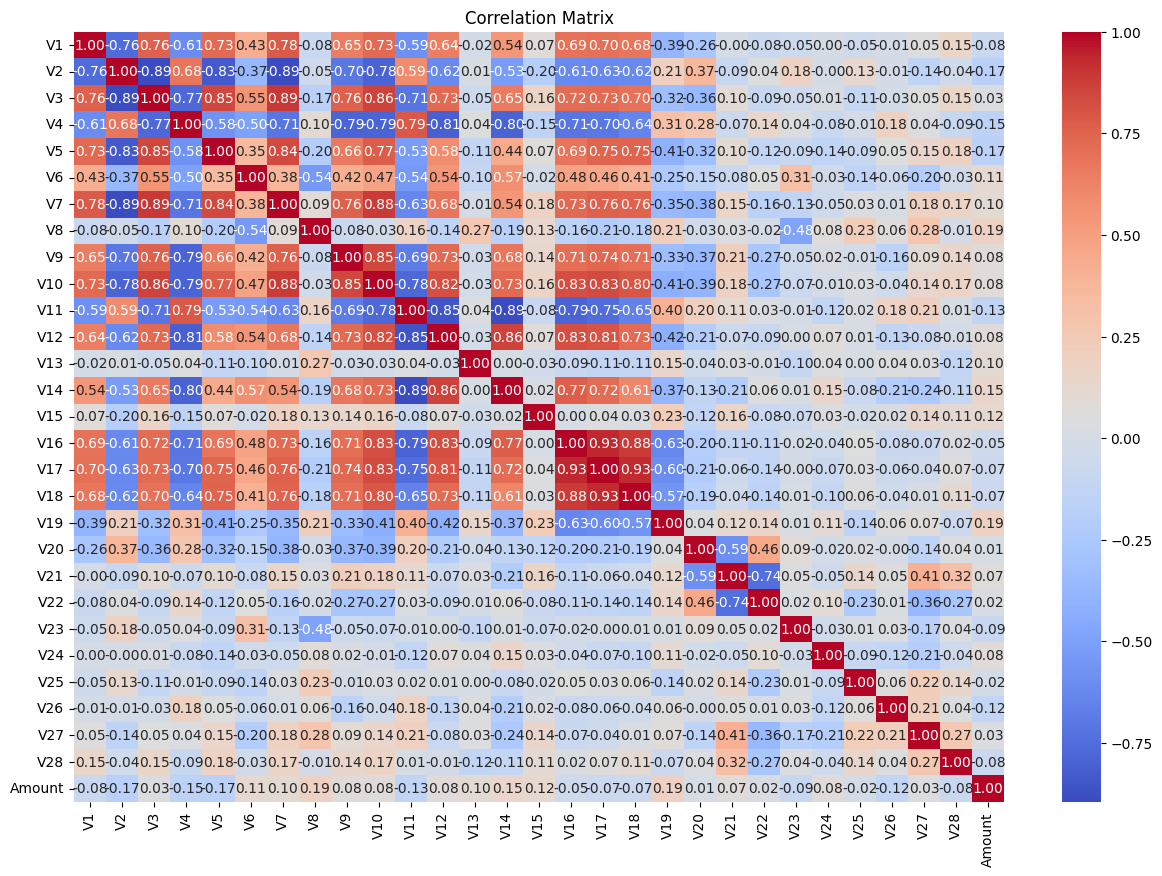

In [150]:


plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Dimensionality reduction (PCA, t-SNE)

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_balanced)

In [151]:
# Analyze explained variance

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.61282361, 0.11339653, 0.07690632, 0.04695285, 0.04212323,
       0.01414424, 0.01066533, 0.00935751, 0.00799089, 0.00679812,
       0.00579818, 0.00512996, 0.00448472, 0.00444723, 0.00388088,
       0.00369689, 0.00356127, 0.00325798, 0.00319345, 0.00285087,
       0.00275953, 0.00269719, 0.0025038 , 0.00230581, 0.00220796,
       0.00188861, 0.00172571, 0.00147191, 0.00097943])

 The first principal component explains the largest amount of variance, about 61.3%. This means most of the important information in the data is captured by the first component. The remaining components explain less variance, with the second and third contributing 11.3% and 7.7% respectively.

---




**explained variance**  --> It helps me determine how many principal components I need to retain in order to preserve most of the information from the original dataset, while reducing the dimensionality without significant loss of important data.



In [23]:
# #Analyze explained variance

# explained_variance = pca.explained_variance_ratio_
# cumulative_variance = np.cumsum(explained_variance)

# #print(cumulative_variance)

# per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1)
# labels = ['PC' + str(x_balanced) for x in range(1, len(per_var)+1)]

# plt.bar(x=range(1,len(per_var)+1) , height=per_var)
# plt.xlabel('Explained variance')
# plt.ylabel('Principal Component')
# plt.show()

In [24]:
# Choose the minimum number of components preserving 90–95% variance.
cumulative_var = np.cumsum(explained_variance)

n_components = np.argmax(cumulative_var >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

the minimum number of components preserving 90–95% variance: 12


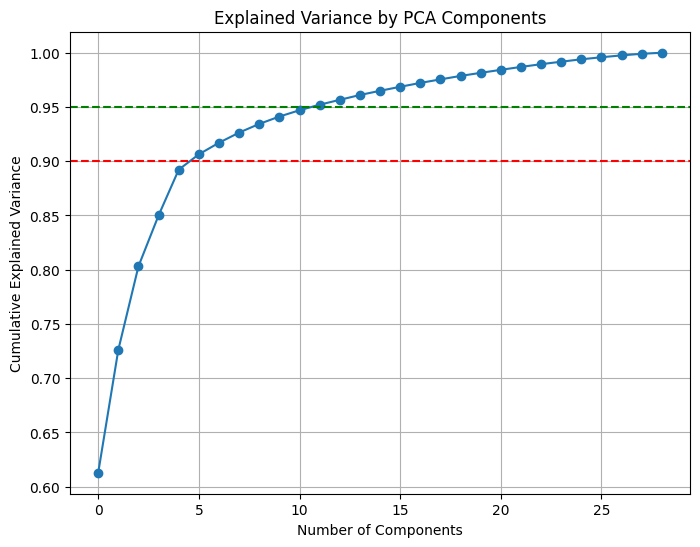

In [25]:

# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

To preserve 95% of the total variance in the dataset, 12 principal components are required. This indicates that the original high-dimensional data can be reduced to just 12 components while still retaining most of its essential information and structure.

---





In [26]:
pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_balanced)
x_pca_reduced.shape

(984, 12)

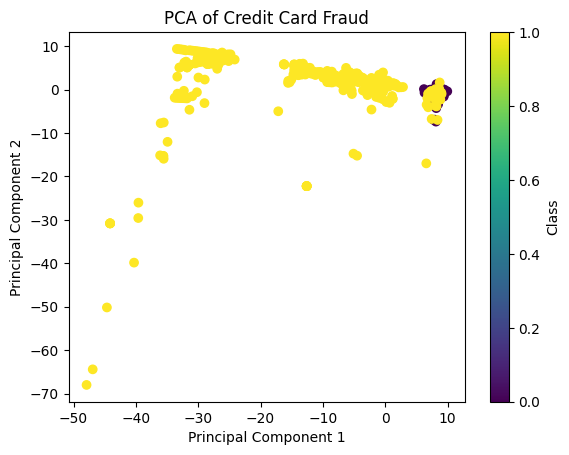

In [27]:
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y_resampled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Fraud')
plt.colorbar(label='Class')
plt.show()

##TSNE

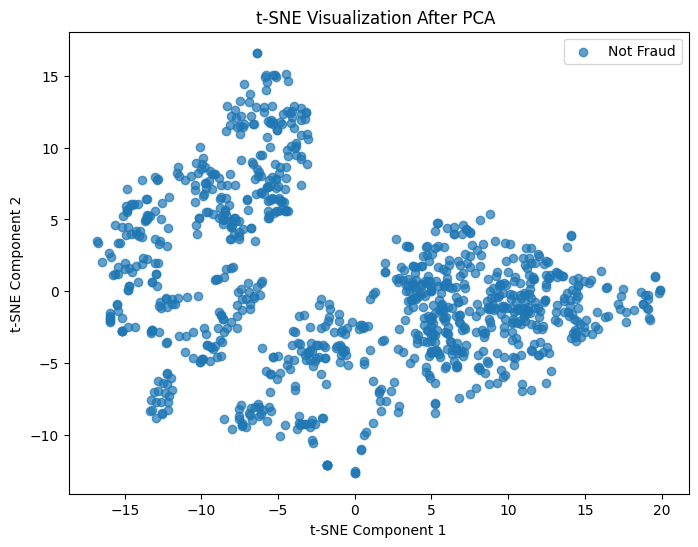

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(x_pca_reduced)


plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.7)
plt.title('t-SNE Visualization After PCA ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


# Clustering

##kmeans

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

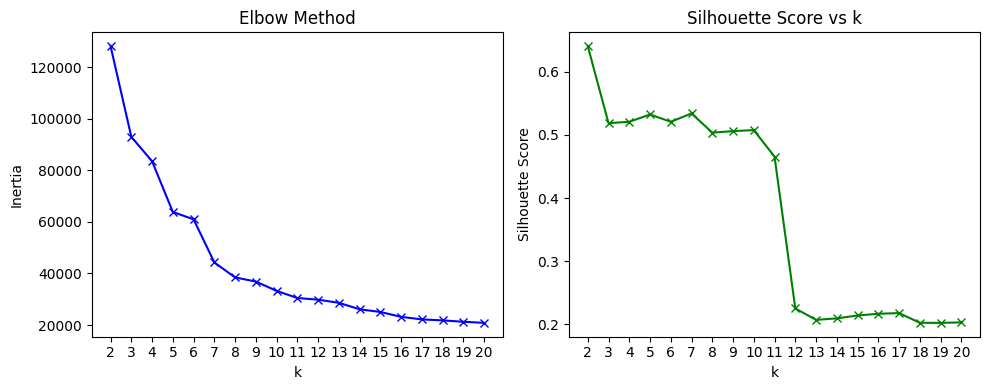

In [87]:
inertias = []
silhouette_scores = []
kmeans_per_k = {}

K = range(2, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca_reduced)
    kmeans_per_k[k] = kmeans
    inertias.append(kmeans.inertia_)
    score = silhouette_score(x_pca_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Elbow plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(K)

# Silhouette plot
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.xticks(K)
plt.tight_layout()
plt.show()

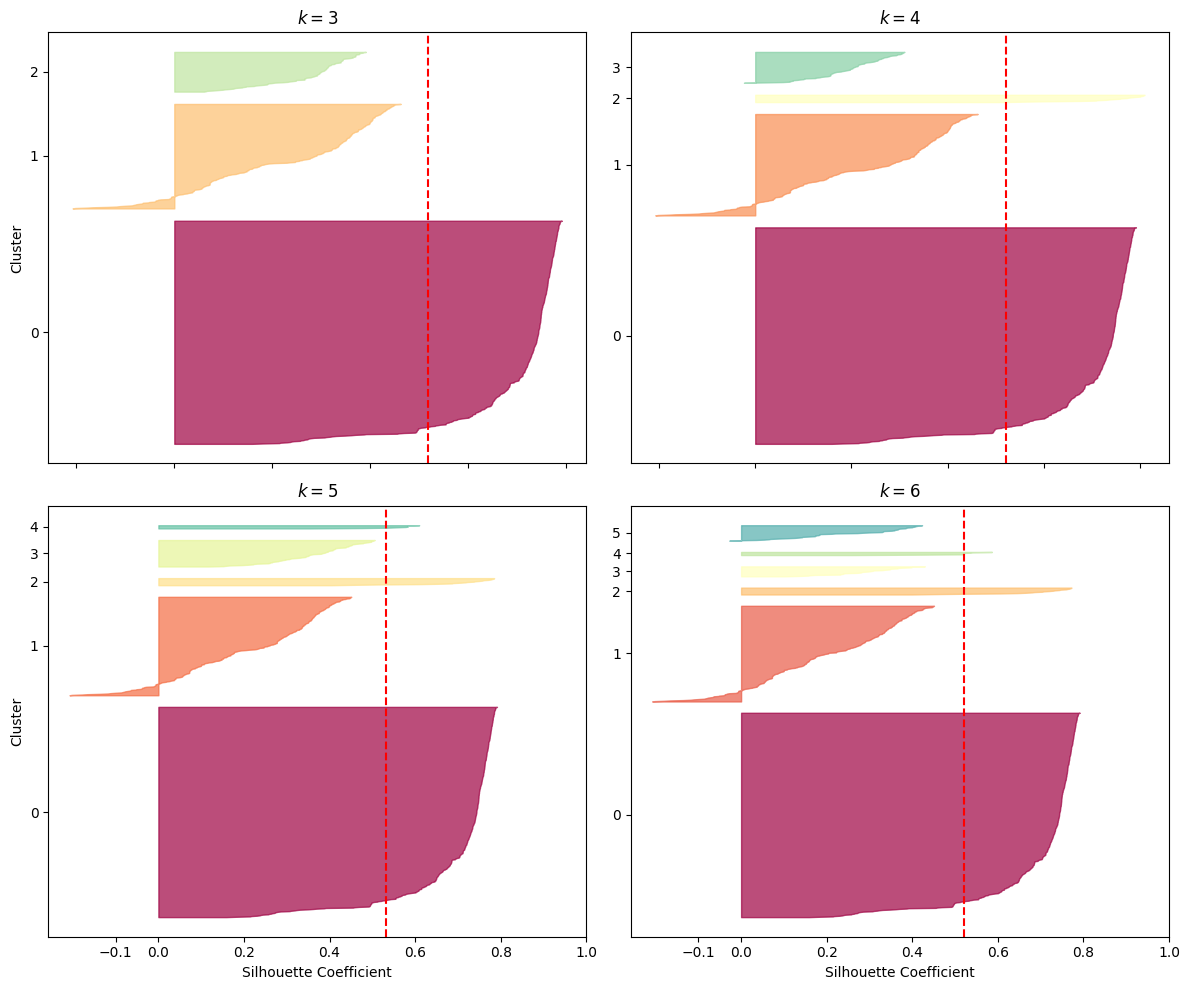

In [88]:
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12, 10))

for i, k in enumerate(( 3, 4 , 5, 6 )):
    # Use i+1 for the subplot index to stay within the 2x2 grid
    plt.subplot(2, 2, i + 1)

    model = kmeans_per_k[k]
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(x_pca_reduced, y_pred)

    padding = len(x_pca_reduced) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Use silhouette_scores[k-2] to access the correct score
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.tight_layout()
plt.show()

In [91]:
kmeans_standerd = KMeans(n_clusters=4,  random_state=42)
kmeans_standerd.fit(x_pca_reduced)

KMeans(n_clusters=4, random_state=42)

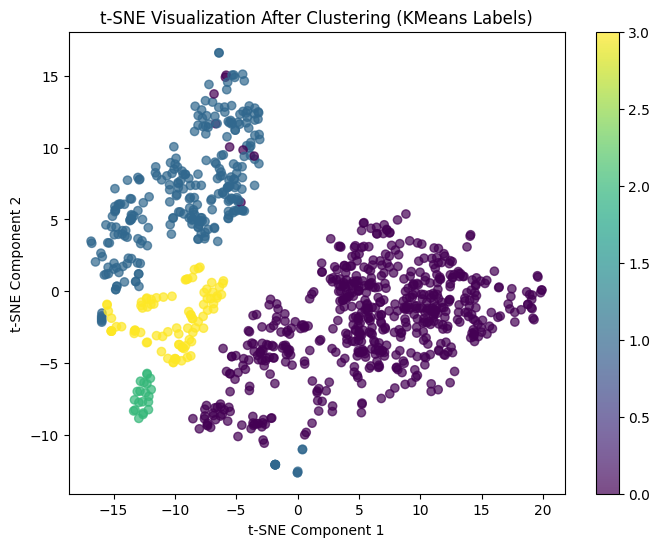

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans_standerd.labels_, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization After Clustering (KMeans Labels)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()


##kmeans ++

In [99]:
kmeans_p = KMeans(n_clusters=4,init="k-means++" , random_state=42)
kmeans_p.fit(x_pca_reduced)

KMeans(n_clusters=4, random_state=42)

In [100]:
#Compare standard K-Means standard and K-Means++.
#1

print("K-Means Iterations:", kmeans_standerd.n_iter_)
print("K-Means++ Iterations:", kmeans_p.n_iter_)
print("------------------------------------------------------------")

#2
print("K-Means Silhouette Score:", silhouette_score(x_pca_reduced, kmeans_standerd.labels_))
print("K-Means++ Silhouette Score:", silhouette_score(x_pca_reduced, kmeans_p.labels_))

K-Means Iterations: 4
K-Means++ Iterations: 4
------------------------------------------------------------
K-Means Silhouette Score: 0.5207493673668407
K-Means++ Silhouette Score: 0.5207493673668407


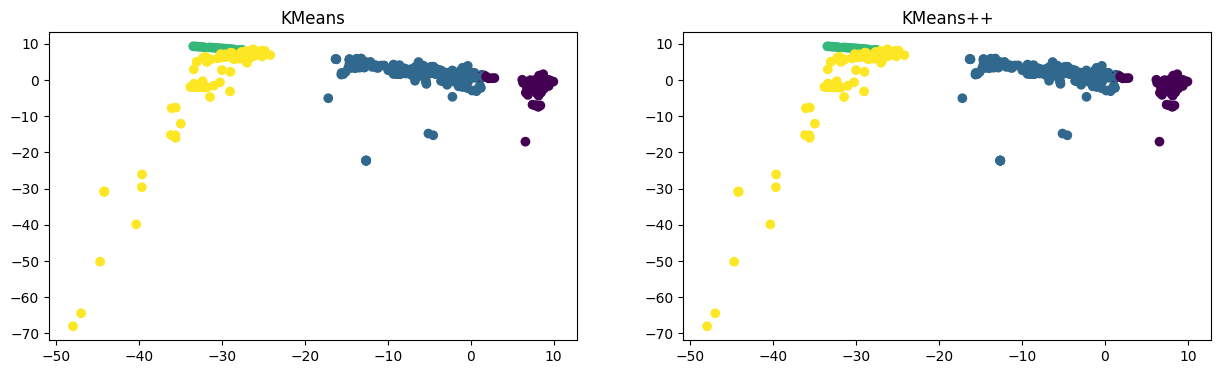

In [111]:


fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
plt.show()


In [70]:
#3
# def plot_clusters(X_pca, labels, title):
#     plt.figure(figsize=(8,6))
#     plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.title(title)

#     plt.ylim(-15, 10)
#     plt.show()

# plot_clusters(x_pca_reduced, kmeans.labels_, "K-Means ")
# plot_clusters(x_pca_reduced, kmeans_p.labels_, "K-Means++ Init")


##MiniBatchKMeans

In [102]:
from sklearn.cluster import MiniBatchKMeans
minikmeans=MiniBatchKMeans(n_clusters=4, random_state=42)
minikmeans.fit(x_pca_reduced)

MiniBatchKMeans(n_clusters=4, random_state=42)

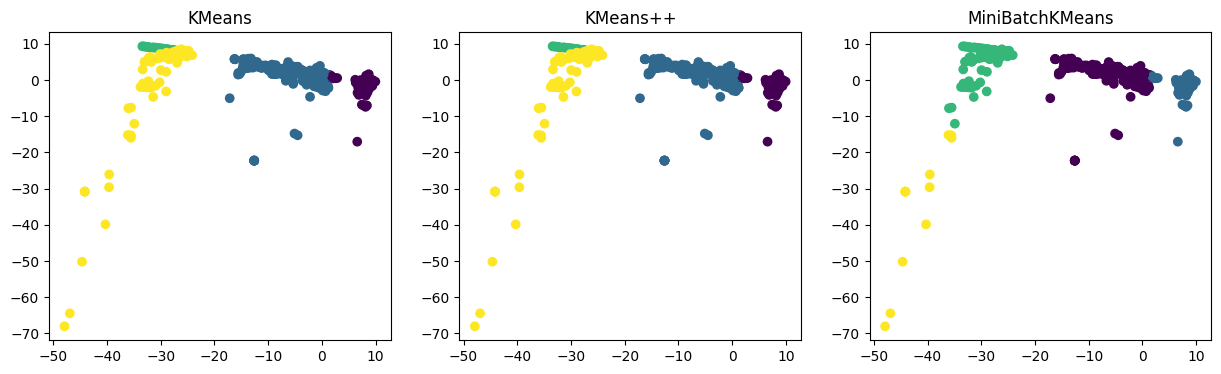

In [104]:

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()


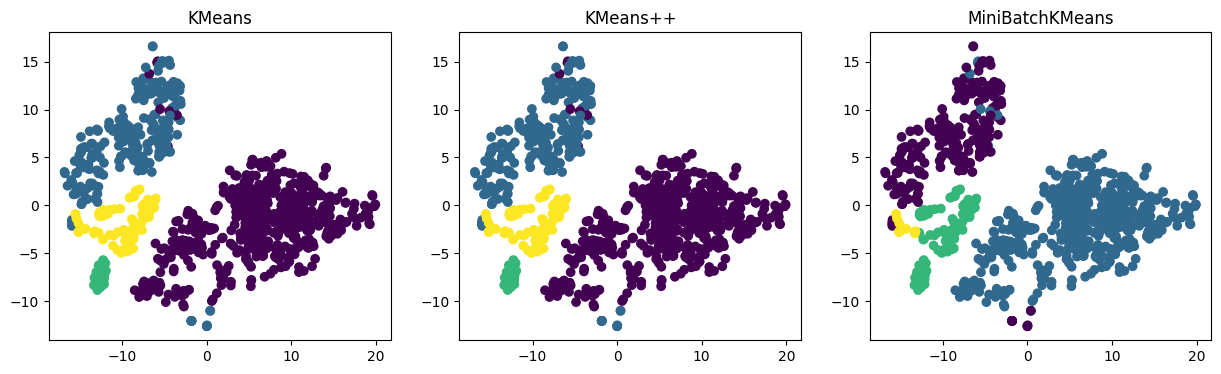

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_standerd.labels_)
axs[0].set_title("KMeans")
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_p.labels_)
axs[1].set_title("KMeans++")
axs[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=minikmeans.labels_)
axs[2].set_title("MiniBatchKMeans")
plt.show()


In [38]:
!pip install memory_profiler

In [154]:
import time
start_time = time.time()
minikmeans=MiniBatchKMeans(n_clusters=4, random_state=42)
minikmeans.fit(x_pca_reduced)
end_time = time.time()
mini_batch_cluster_labels = minikmeans.labels_
mini_batch_time = end_time-start_time

mini_batch_silhouette = silhouette_score(x_pca_reduced, mini_batch_cluster_labels)

print("Mini-Batch K-Means:")
print(f"  Time taken: {mini_batch_time:.4f} seconds")
print(f"  Silhouette Score: {mini_batch_silhouette}")


start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_pca_reduced)
end_time = time.time()
kmeans_time = end_time - start_time

kmeans_silhouette = silhouette_score(x_pca_reduced, kmeans.labels_)

print("\nStandard K-Means:")
print(f"  Time taken: {kmeans_time:.4f} seconds")
print(f"  Silhouette Score: {kmeans_silhouette}")


print("\nComparison:")
print(f"  Time difference: {mini_batch_time - kmeans_time:.4f} seconds")
print(f"  Silhouette difference: {mini_batch_silhouette - kmeans_silhouette:.4f}")


Mini-Batch K-Means:
  Time taken: 0.0065 seconds
  Silhouette Score: 0.5288774694974904

Standard K-Means:
  Time taken: 0.0027 seconds
  Silhouette Score: 0.5207493673668407

Comparison:
  Time difference: 0.0038 seconds
  Silhouette difference: 0.0081


In [162]:

from memory_profiler import memory_usage

def kmeans():
    kmeans = KMeans(n_clusters=4 , random_state=42)
    kmeans.fit(x_pca_reduced)

def kmeans_minibatch():
    minikmeans=MiniBatchKMeans(n_clusters=4, random_state=42)
    minikmeans.fit(x_pca_reduced)

mem_standerd = memory_usage(kmeans)
mem_mini = memory_usage(kmeans_minibatch)

print("standerd Memory Usage:", max(mem_standerd), "MiB")
print("mini_batch  Memory Usage:", max(mem_mini), "MiB")

standerd Memory Usage: 995.15625 MiB
mini_batch  Memory Usage: 995.15625 MiB


 **Note:**

1.   The memory usage appears similar for both KMeans and MiniBatchKMeans.



2.   This is likely because the dataset is relatively small, and PCA has already reduced its dimensions.





3.   MiniBatchKMeans shows clear memory and speed advantages mainly with large-scale data.



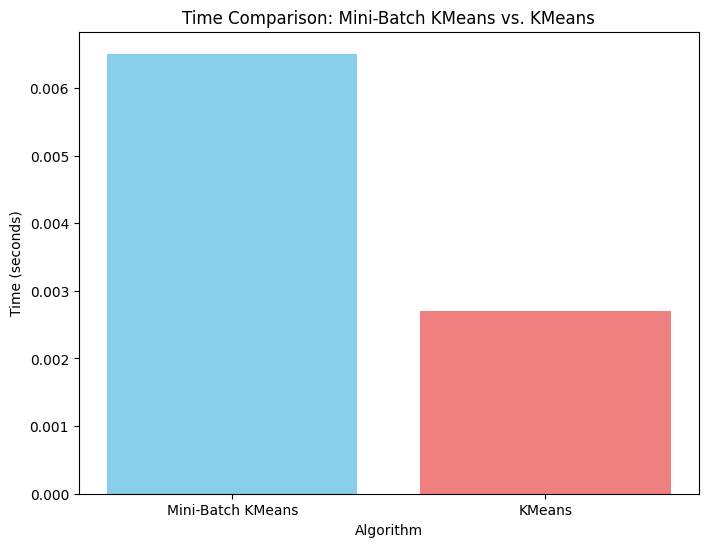

In [165]:
algorithms = ['Mini-Batch KMeans', 'KMeans']
times = [mini_batch_time, kmeans_time]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, times, color=['skyblue', 'lightcoral'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison: Mini-Batch KMeans vs. KMeans')
plt.show()


##DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
labels =dbscan.fit_predict(x_pca_reduced)
label_counts = pd.Series(labels).value_counts().sort_index()

print(label_counts)

-1    946
 0      7
 1     10
 2      5
 3      5
 4      5
 5      6
Name: count, dtype: int64


In [106]:
# from sklearn.model_selection import GridSearchCV

# def silhouette_scorer(estimator, x_scaled_m):
#     labels = estimator.fit_predict(x_scaled_m)
#     if len(set(labels)) > 1 and -1 not in set(labels):
#         return silhouette_score(x_scaled_m, labels)
#     else:
#         return -1

# dbcan_grid = {'eps': [7,3,4, 5, 6, 9, 10],
#               'min_samples': [10,15,20, 25, 30, 40]}
# dbcanSearch = GridSearchCV(DBSCAN(), dbcan_grid, scoring=silhouette_scorer)
# dbcanSearch.fit(x_pca_reduced)

# print(dbcanSearch.best_score_)
# print(dbcanSearch.best_params_)



In [44]:
best_dbscan = DBSCAN(eps=7, min_samples=10)
labels = best_dbscan.fit_predict(x_pca_reduced)
label_counts = pd.Series(labels).value_counts().sort_index()
print(label_counts)

-1     81
 0    838
 1     44
 2     21
Name: count, dtype: int64


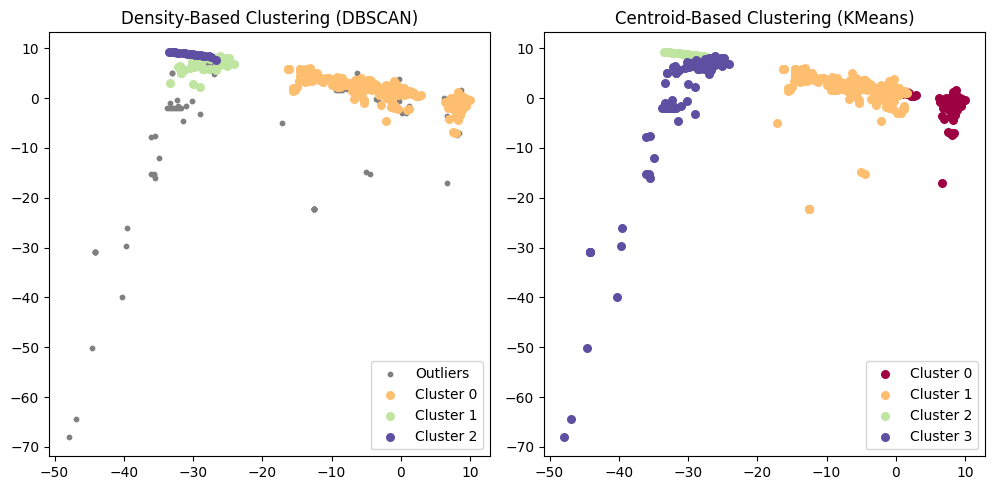

In [46]:



db_model = DBSCAN(eps=7, min_samples=10)
db_labels = db_model.fit_predict(x_pca_reduced)

km_model = KMeans(n_clusters=4, random_state=42)
km_labels = km_model.fit_predict(x_pca_reduced)

plt.figure(figsize=(15, 5))

plt.subplot(131)
db_unique = np.unique(db_labels)
color_map_db = plt.cm.Spectral(np.linspace(0, 1, len(db_unique)))

for group, shade in zip(db_unique, color_map_db):
    mask = (db_labels == group)
    if group == -1:
        plt.scatter(x_pca_reduced[mask][:, 0], x_pca_reduced[mask][:, 1], color='gray', s=10, label='Outliers')
    else:
        plt.scatter(x_pca_reduced[mask][:, 0], x_pca_reduced[mask][:, 1], color=shade, s=30, label=f'Cluster {group}')

plt.title('Density-Based Clustering (DBSCAN)')
plt.legend()

plt.subplot(132)
km_unique = np.unique(km_labels)
color_map_km = plt.cm.Spectral(np.linspace(0, 1, len(km_unique)))

for group, shade in zip(km_unique, color_map_km):
    plt.scatter(x_pca_reduced[km_labels == group][:, 0], x_pca_reduced[km_labels == group][:, 1], color=shade, s=30, label=f'Cluster {group}')

plt.title('Centroid-Based Clustering (KMeans)')
plt.legend()

plt.tight_layout()
plt.show()


##Anomaly detection